# Week 3 - Probability Distributions 1 and 2

### Jonas Lund, 201906201, 20/09/2022

Learning contents:

1. Frequenist's approach
    - Bernoulli distribution function
    - Maximum Likelihood
    - Display distribution
2. Bayesian approach
    - Binomial distribution
    - Display Binomial distribution for different m
    - Maximum posterior
3. Multinomial variables
    - Generate data
    - Frequenist's approach
        - Multinomial Bernoulli distribution function
        - Maximum likelihood
    - Bayesian approach
        - Maximum posterior
4. Gaussian distribution
    - Distribution function
    - Generate data
    - Display data
    - Frequenist's approach
        - Maximum likelihood
        - Display distribution
    - Bayesian approach
        - Generate data
        - Variance is known, mean is unknown
        - Display mean estimation for different N

## Dependencies

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import exp, sqrt
from collections import Counter
from scipy.special import comb
from scipy.stats import beta
from scipy.stats import multivariate_normal, norm

import seaborn as sns; sns.set(); sns.set_palette('bright')

## Generate Data

In [32]:
random.seed(2605)

def weighted_coin(heads=0.7, tails=0.3):
    total = heads + tails
    value = random.random() * total
    result = 0 if value <= tails else 1
    return result


def generate_data(size):
    return list(map(
        lambda i: weighted_coin(),
        range(size)
    ))


train_size = 26
train_data = generate_data(train_size)

<BarContainer object of 2 artists>

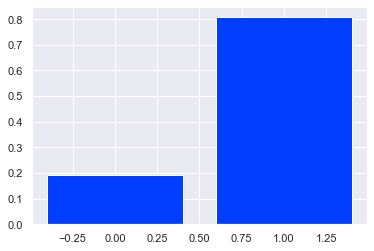

In [33]:
counter = Counter(train_data)
plt.bar(counter.keys(), list(map(lambda a: a / train_size, counter.values())))

## 1) Frequenist's approach

### 1.1) Bernoulli distribution function

In [34]:
def bern(x, mu):
    res = mu**x * (1 - mu)**(1-x)
    return res

### 1.2) Maximum Likelihood

`mu_maximum_likelihood_bern` takes data points `train_data` and should return Maximum Likelihood estimate of a Bernoulli distribution

In [35]:
def mu_maximum_likelihood_bern(train_data):
    res = sum([
        x_i
        for x_i in train_data
    ]) / len(train_data)
    return res

mu_ml = mu_maximum_likelihood_bern(train_data)

### 1.3) Display distribution

In [36]:
def display_bernoulli(mu, color='b'):

    xs = np.linspace(0., 1., 100)
    ys = list(map(
        lambda x: bern(x, mu),
        xs
    ))

    plt.plot(xs,ys, '-' + color)

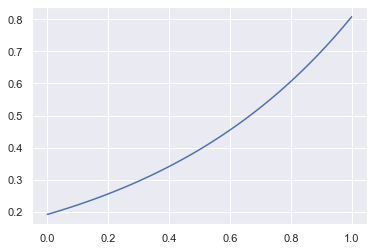

In [37]:
display_bernoulli(mu_ml)

## 2) Bayesian approach

### 2.1) Binomial distribution

In [38]:
from math import factorial

def binomial(m, N, mu):
    res = factorial(N) / (factorial(N - m) * factorial(m)) * mu**m * (1 - mu)**(N-m)
    return res

### 2.2) Display Binomial distribution for different m

In [39]:
def display_binomial(N, mu):
    xs = list(range(N))
    ys = list(map(
        lambda m: binomial(m, N, mu),
        xs
    ))
    
    plt.bar(xs, ys)

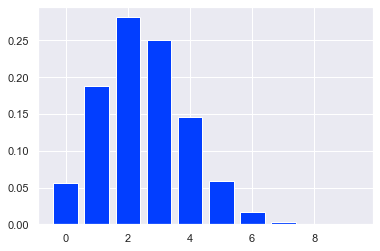

In [40]:
display_binomial(10, 0.25)

### 2.3) Maximum posterior

`mu_maximum_posterior_bern` takes `m`, `N`, `a`, `b` and should return Maximum Posterior estimate of a Bernoulli distribution. Posterior distribution is in form of a Beta distribution.

In [41]:
def mu_maximum_posterior_bern(m, N, a, b):
    l = N - m
    res = (m + a) / (m + a + l + b)
    return res

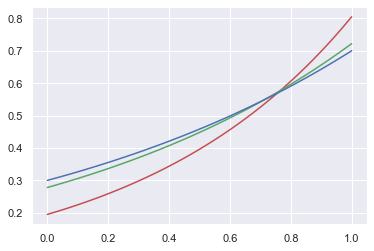

In [42]:
display_bernoulli(
    mu_maximum_posterior_bern(sum(train_data), train_size, 0.1, 0.1), 'r'
)
display_bernoulli(
    mu_maximum_posterior_bern(sum(train_data), train_size, 70, 30), 'g'
)
display_bernoulli(
    mu_maximum_posterior_bern(sum(train_data), train_size, 7000, 3000), 'b'
)

## 3) Multinomial variables

### 3.1) Generate data

In [43]:
np.random.seed(26)

def generate_multinomial_data(size, probabilities):
    numbers = np.random.choice(len(probabilities), size, probabilities)
    
    result = np.zeros((numbers.size, len(probabilities)))
    result[np.arange(numbers.size), numbers] = 1
    return result
    
probabilities=[0.5, 0.1, 0.2, 0.1, 0.1]
multinomial_data = generate_multinomial_data(26, probabilities)
multinomial_data

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

### 3.2) Frequenist's approach

#### 3.2.1) Multinomial Bernoulli distribution function

In [44]:
from functools import reduce
from operator import mul

def bern_multi(xs, mus):
    assert(len(xs) == len(mus))
    K = len(xs)
    res = reduce(mul, [
        mus[k]**xs[k]
        for k in range(K)
    ], 1)
    return res

#### 3.2.2) Maximum likelihood

`mu_maximum_likelihood_multinomial_bern` takes multinomial data points `multinomial_data` and should return Maximum Likelihood estimate of a Multinomial Bernoulli distribution

In [45]:
def mu_maximum_likelihood_multinomial_bern(multinomial_data):
    res = sum(multinomial_data) / len(multinomial_data)
    return res

multi_mu_ml = mu_maximum_likelihood_multinomial_bern(multinomial_data)
multi_mu_ml

array([0.19230769, 0.11538462, 0.23076923, 0.23076923, 0.23076923])

### 3.3) Bayesian approach

#### 3.3.1) Maximum posterior

`multinomial_mu_maximum_posterior_bern` takes multinomial data points `ms`, number of points `N`, data about prior belief `alphas` and should return Maximum Posterior estimate of a Multinomial Bernoulli distribution

In [46]:
from scipy.integrate import quad
from cmath import inf

def multinomial_mu_maximum_posterior_bern(ms, N, alphas):
    ms = np.array(ms)
    alphas = np.array(alphas)
    res = (ms + alphas) / sum(alphas + ms)
    return res


ms = list(map(lambda k: sum(multinomial_data[:, k]), range(len(multinomial_data[0]))))

In [47]:
print(multinomial_mu_maximum_posterior_bern(ms, len(multinomial_data), [5, 1, 2, 1, 1]))
print(multinomial_mu_maximum_posterior_bern(ms, len(multinomial_data), [50, 10, 20, 10, 10]))
print(multinomial_mu_maximum_posterior_bern(ms, len(multinomial_data), [500, 100, 200, 100, 100]))

[0.27777778 0.11111111 0.22222222 0.19444444 0.19444444]
[0.43650794 0.1031746  0.20634921 0.12698413 0.12698413]
[0.49220273 0.10038986 0.20077973 0.10331384 0.10331384]


In [48]:
print(probabilities)

[0.5, 0.1, 0.2, 0.1, 0.1]


## 4) Gaussian distribution

### 4.1) Distribution function

In [49]:
def multi_gaussian(x, mean, covariance):
    res = exp(-1 / 2 * covariance * (x - mean)**2) / (2 * np.pi * covariance)**0.5
    return res

### 4.2) Generate data

In [50]:
def generate_multi_gaussian_data(size, mean, covariance):
    return np.array(multivariate_normal(mean=mean, cov=covariance).rvs(size=size, random_state=26))

target_mean = [1.7, -4]
target_cov = [[1, 0.1], [0.1, 1]]
multi_gaussian_data = generate_multi_gaussian_data(50, target_mean, target_cov)

### 4.3) Display data

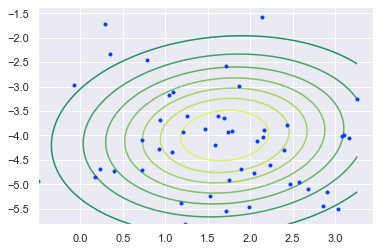

In [51]:
plt.plot(multi_gaussian_data[:, 0], multi_gaussian_data[:, 1], '.')

def display_gaussian_contour(data, mean, covariance, cmap='summer'):

    lx = min(data[:, 0])
    rx = max(data[:, 0])
    by = min(data[:, 1])
    uy = max(data[:, 1])

    x, y = np.mgrid[lx:rx:.01, by:uy:.01]
    pos = np.dstack((x, y))
    plt.contour(x, y, multivariate_normal(mean, covariance).pdf(pos), cmap=cmap)

display_gaussian_contour(multi_gaussian_data, target_mean, target_cov)

### 4.4) Frequenist's approach

#### 4.4.1) Maximum likelihood

`multi_gaussian_mu_maximum_likelihood` takes multinomial data points `multinomial_data` and should return Maximum Likelihood estimate of a mean of Multivariate Gaussian distribution

In [52]:
def multi_gaussian_mu_maximum_likelihood(multi_gaussian_data):
    res = sum(multi_gaussian_data) / len(multi_gaussian_data)
    return res

g_mu_ml = multi_gaussian_mu_maximum_likelihood(multi_gaussian_data)
g_mu_ml

array([ 1.64301733, -4.13747801])

`multi_gaussian_covariance_maximum_likelihood` takes multinomial data points `multinomial_data`, Maximum Likelihood for `mu` (`g_mu_ml`) and should return Maximum Likelihood estimate of a covariance of Multivariate Gaussian distribution

In [53]:
def multi_gaussian_covariance_maximum_likelihood(multi_gaussian_data, g_mu_ml):
    res = sum([
        np.outer((x - g_mu_ml), (x - g_mu_ml))
        for x in multi_gaussian_data
    ]) / len(multi_gaussian_data)
    return res

g_cov_ml = multi_gaussian_covariance_maximum_likelihood(multi_gaussian_data, g_mu_ml)
g_cov_ml

array([[ 0.8306221 , -0.18058579],
       [-0.18058579,  0.95533279]])

#### 4.4.2) Display distribution

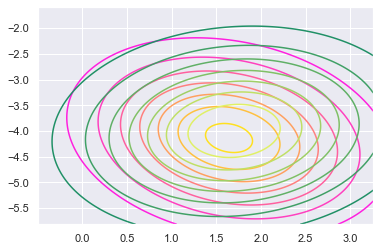

In [54]:
display_gaussian_contour(multi_gaussian_data, g_mu_ml, g_cov_ml, cmap='spring')
display_gaussian_contour(multi_gaussian_data, target_mean, target_cov, cmap='summer')

### 4.5) Bayesian approach

#### 4.5.1) Generate data

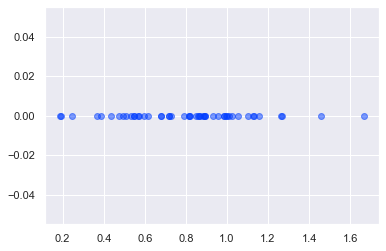

In [55]:
def generate_gaussian_data(size, mean, variance):
    return np.array(norm(mean, sqrt(variance)).rvs(size=size, random_state=26))

g_mean = 0.8
g_variance = 0.1
gaussian_data = generate_gaussian_data(50, g_mean, g_variance)

plt.scatter(gaussian_data, [0] * len(gaussian_data), alpha=0.5)

#### 4.5.2) Variance is known, mean is unknown

`multi_gaussian_mu_maximum_posterior` takes data points `gaussian_data`, prior `mu0` and `variance0`, `variance` and should return Maximum Posterior estimate of a mean of Multivariate Gaussian distribution

In [56]:
def multi_gaussian_mu_maximum_posterior(gaussian_data, mu0, variance0, variance):
    N = len(gaussian_data)
    mu_ml = 0 if N == 0 else np.mean(gaussian_data)
    mu_N = mu0 * variance / (N * variance0 + variance) + mu_ml * N * variance0 / (N * variance0 + variance)
    variance_N = 1 / (1 / variance0 + N / variance)
    res = (mu_N, variance_N)
    return res

g_mu_map, g_mu_var_map = multi_gaussian_mu_maximum_posterior(gaussian_data, 0, g_variance, g_variance)
g_mu_map, g_mu_var_map

(0.78730491213259, 0.00196078431372549)

#### 4.5.3) Display mean estimation for different N

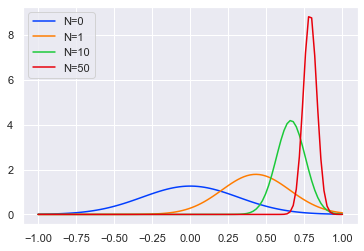

In [57]:
def display_mu_map(gaussian_data, mu0, variance0, variance):
    g_mu_map, g_mu_var_map = multi_gaussian_mu_maximum_posterior(gaussian_data, 0, g_variance, g_variance)
    x = np.linspace(-1, 1, 100)
    y = norm(g_mu_map, sqrt(g_mu_var_map)).pdf(x)
    plt.plot(x, y, label='N=' + str(len(gaussian_data)))
    plt.legend()

display_mu_map(gaussian_data[:0], 0, g_variance, g_variance)
display_mu_map(gaussian_data[:1], 0, g_variance, g_variance)
display_mu_map(gaussian_data[:10], 0, g_variance, g_variance)
display_mu_map(gaussian_data, 0, g_variance, g_variance)